<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [205]:
import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline

In [179]:
df = pickle.load(open('exp1.obj','rb'))
df = df.astype('float64')

In [180]:
mean = df.copy()
print(len(df.T[['train_RBF_rmse']]))
mean = mean.groupby(level=0).mean()
std = df.copy()
std = std.groupby(level=0).std()

20


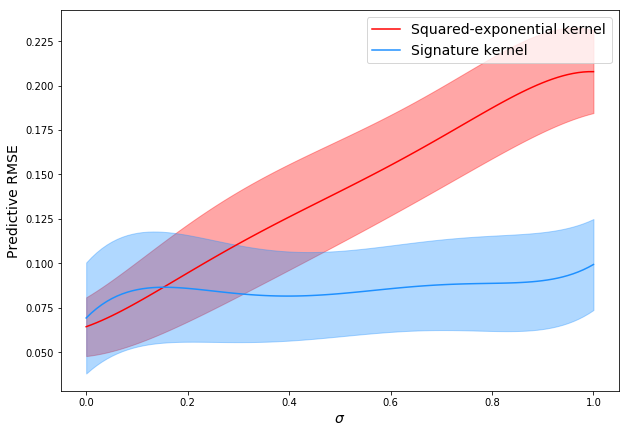

In [258]:
fig,ax = plt.subplots(1,figsize=(10,7))




#m = mean.T[['test_RBF_rmse','test_Sig_rmse']] #,'train_RBF_r2','train_Sig_r2']]
#stdv = std.T[['test_RBF_rmse','test_Sig_rmse']] #.ewm(alpha=0.2).mean()#,'train_RBF_r2','train_Sig_r2']]
#m.plot(ax=ax)
#ax.fill_between(m.index, m.iloc[:,0] - stdv.iloc[:,0], m.iloc[:,0] + stdv.iloc[:,0], alpha=0.35)
#ax.fill_between(m.index, m.iloc[:,1] - stdv.iloc[:,1], m.iloc[:,1] + stdv.iloc[:,1], alpha=0.35)


k = 5
f1 = UnivariateSpline(m.index, m.iloc[:,0],k=k,s=0.003)
f2 = UnivariateSpline(m.index, m.iloc[:,1],k=k,s=0.003)#,kind=method)
f1_s = UnivariateSpline(m.index, stdv.iloc[:,0],k=k,s=0.003)#,kind=method)
f2_s = UnivariateSpline(m.index, stdv.iloc[:,1],k=k,s=0.003)#,kind=method)

#method = 'cubic'
#f1 = interp1d(m.index, m.iloc[:,0],kind=method)
#f2 = interp1d(m.index, m.iloc[:,1],kind=method)
#f1_s = interp1d(m.index, stdv.iloc[:,0],kind=method)
#f2_s = interp1d(m.index, stdv.iloc[:,1],kind=method)

#m.plot(ax=ax)
col1 = 'red'
col2='dodgerblue'
param = np.linspace(0,1,100)
ax.plot(param,f1(param),color=col1,label='Squared-exponential kernel')
ax.plot(param,f2(param),color=col2,label='Signature kernel')
ax.fill_between(param, f1(param) - f1_s(param) , f1(param) +  f1_s(param), alpha=0.35,color=col1)
ax.fill_between(param, f2(param) -  f2_s(param), f2(param) +  f2_s(param), alpha=0.35,color=col2)
ax.set_xlabel(r'$\sigma$',fontsize=14)
ax.set_ylabel(r'Predictive RMSE',fontsize=14)
plt.legend(fontsize=14)
plt.savefig('comparison_ellipsis.pdf')
plt.show()

In [ ]:
fig,ax = plt.subplots(1,figsize=(10,7))
m = mean.T[['test_RBF_rmse','test_Sig_rmse']]#,'train_RBF_r2','train_Sig_r2']]
stdv = std.T[['test_RBF_rmse','test_Sig_rmse']]#,'train_RBF_r2','train_Sig_r2']]
m.plot(ax=ax)
ax.fill_between(m.index, m.iloc[:,0] - stdv.iloc[:,0], m.iloc[:,0] + stdv.iloc[:,0], alpha=0.35)
ax.fill_between(m.index, m.iloc[:,1] - stdv.iloc[:,1], m.iloc[:,1] + stdv.iloc[:,1], alpha=0.35)


plt.show()